In [1]:
#imports
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#importing the data from tensorflow datasets
(train_img, train_label), (test_img, test_label) = tf.keras.datasets.cifar10.load_data()

#normalizing the data to vary between [0 .. 1]
train_img, test_img = train_img/255.0, test_img/255.0

In [3]:
print(f'train image shape: {train_img.shape}')
print(f'train label shape: {train_label.shape}')
print(f'test image shape: {test_img.shape}')
print(f'test label shape: {test_label.shape}')

train image shape: (50000, 32, 32, 3)
train label shape: (50000, 1)
test image shape: (10000, 32, 32, 3)
test label shape: (10000, 1)


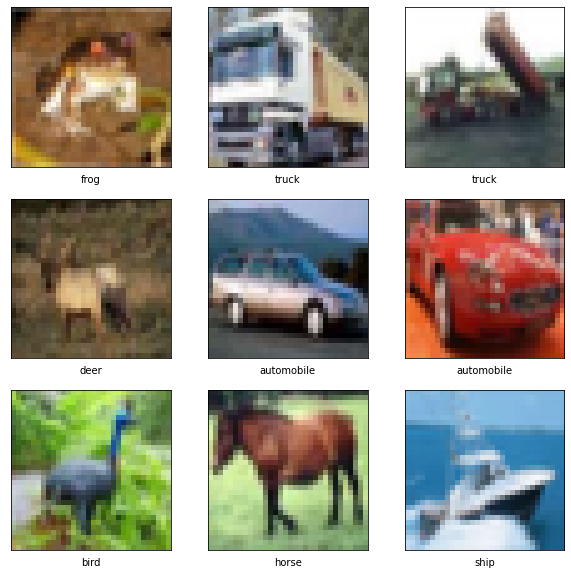

In [4]:
#defining the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = 10

plt.figure(figsize=(10, 10))

#ploting a 3 by 3 image matrix
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow((train_img[i]))
    plt.xlabel(f'{class_names[train_label[i][0]]}')
plt.show()

In [8]:
#building a sequence of layers for classifying model
def build_model(inputs):
    x = tf.keras.layers.Conv2D(filters = 16, kernel_size=(2, 2), activation = 'relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    
    x = tf.keras.layers.Conv2D(filters = 32, kernel_size=(2, 2), activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    
    x = tf.keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    x = tf.keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation = 'relu')(x)
    x = tf.keras.layers.Dense(num_classes, activation = 'softmax')(x)
    
    return x

def define_model():
    inputs = tf.keras.layers.Input(shape = (32, 32, 3))
    outputs = build_model(inputs)
    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    
    model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ['accuracy'])
    
    return model

In [9]:
classifier_model = define_model()

classifier_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 31, 31, 16)        208       
                                                                 
 batch_normalization_4 (Batc  (None, 31, 31, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        2080      
                                                                 
 batch_normalization_5 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0   

In [10]:
#creating a checkpoint to save the epoch
checkpoint_path = os.path.join('training', 'Cifar\ ')
callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = classifier_model.fit(train_img, train_label, 
                               batch_size=64,
                               validation_data= (test_img, test_label),
                               callbacks=[callback],
                               epochs=30)

Epoch 1/30


C:\Users\mkbha\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - ETA: 0s - loss: 1.2793 - accuracy: 0.5507
Epoch 1: saving model to training\Cifar\ 
782/782 [==============================] - 9s 5ms/step - loss: 1.2793 - accuracy: 0.5507 - val_loss: 1.0436 - val_accuracy: 0.6333
Epoch 2/30
771/782 [============================>.] - ETA: 0s - loss: 0.8674 - accuracy: 0.6941
Epoch 2: saving model to training\Cifar\ 
782/782 [==============================] - 4s 4ms/step - loss: 0.8673 - accuracy: 0.6943 - val_loss: 0.8803 - val_accuracy: 0.6965
Epoch 3/30
776/782 [============================>.] - ETA: 0s - loss: 0.6940 - accuracy: 0.7570
Epoch 3: saving model to training\Cifar\ 
782/782 [==============================] - 4s 5ms/step - loss: 0.6941 - accuracy: 0.7570 - val_loss: 0.8896 - val_accuracy: 0.7050
Epoch 4/30
773/782 [============================>.] - ETA: 0s - loss: 0.5786 - accuracy: 0.7980
Epoch 4: saving model to training\Cifar\ 
782/782 [==============================] - 4s 5ms/step - loss: 0.5

313/313 - 1s - loss: 1.8454 - accuracy: 0.7432 - 690ms/epoch - 2ms/step


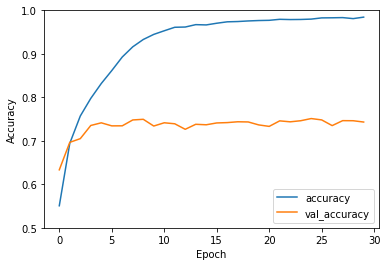

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = classifier_model.evaluate(test_img,  test_label, verbose=2)

1/1 [==============================] - 0s 12ms/step


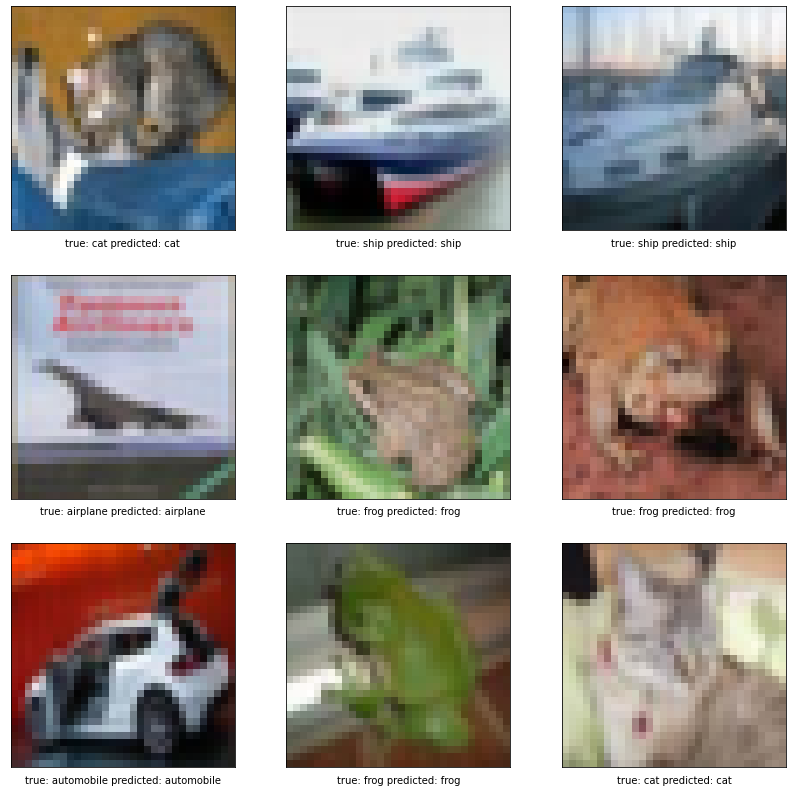

In [15]:
prediction = classifier_model.predict(test_img[:10])

predictions = np.argmax(prediction, axis = -1)

predictions_label = [class_names[idx] for idx in predictions]

plt.figure(figsize=(14, 14))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow((test_img[i]))
    plt.xlabel(f'true: {class_names[test_label[i][0]]} predicted: {predictions_label[i]}', backgroundcolor = 'w')
plt.show()